In [20]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
#import data
df = pd.read_csv(r'/kaggle/input/cancer2025/Cancer2025exam.csv')

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [21]:

#load data
y = df.iloc[:, 0]
X = df.iloc[:, 1:]


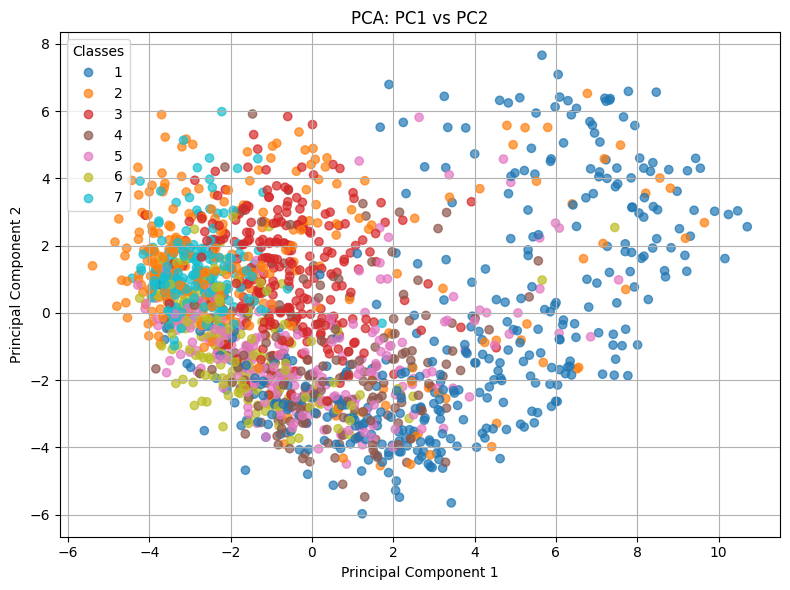

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Extract PC1 and PC2
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

# Plot PC1 vs PC2
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pc1, pc2, c=y, cmap='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()


In [24]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1715, 201)
y shape: (1715,)


In [25]:
models = {
    "KNN": (KNeighborsClassifier(), {
        'clf__n_neighbors': [i for i in range(1, 40, 2)],
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['minkowski', 'euclidean', 'manhattan']
    }),
    
    "LDA": (LinearDiscriminantAnalysis(), {
    }),
    
    "LogReg": (LogisticRegression(max_iter=1000), {
        'clf__C': [0.01, 0.1, 1, 10],
    }),
    
    "RandomForest": (RandomForestClassifier(), {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [5, 10, 15],
        'clf__min_samples_split': [2, 5, 7]
    }),
    
    "SVM": (SVC(), {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 'auto']
    }),
    
    "MLP": (MLPClassifier(max_iter=1000), {
        'clf__hidden_layer_sizes': [(50,), (100,)],
        'clf__alpha': [0.0001, 0.001],
        'clf__learning_rate_init': [0.001, 0.01]
    })
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

repeats = 5
test_accuracies = {name: [] for name in models.keys()}
best_params_across_runs = {name: [] for name in models.keys()}
conf_matrix_sums = {name: np.zeros((len(np.unique(y)), len(np.unique(y))), dtype=int) for name in models.keys()}

for i in range(repeats):
    print(f"\n🔁 Repetition {i+1}/{repeats}")
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
    
    for name, (clf, param_grid) in models.items():
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', clf)
        ])
        
        grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, scoring='accuracy')
        grid.fit(X_train, y_train)
        
        acc = accuracy_score(y_test, grid.predict(X_test))
        test_accuracies[name].append(acc)
        best_params_across_runs[name].append(grid.best_params_)

        y_pred = grid.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        conf_matrix_sums[name] += cm

        print(f"{name}: {acc:.4f}")
    


🔁 Repetition 1/5
KNN: 0.7930
LDA: 0.8047
LogReg: 0.8017
RandomForest: 0.8601
SVM: 0.8280
MLP: 0.8017

🔁 Repetition 2/5
KNN: 0.8047
LDA: 0.8105
LogReg: 0.8192



KNN Best Parameters Across Runs:
  Run 1: {'clf__metric': 'minkowski', 'clf__n_neighbors': 27, 'clf__weights': 'distance'}
  Run 2: {'clf__metric': 'minkowski', 'clf__n_neighbors': 15, 'clf__weights': 'distance'}
  Run 3: {'clf__metric': 'minkowski', 'clf__n_neighbors': 15, 'clf__weights': 'distance'}
  Run 4: {'clf__metric': 'minkowski', 'clf__n_neighbors': 15, 'clf__weights': 'distance'}
  Run 5: {'clf__metric': 'minkowski', 'clf__n_neighbors': 17, 'clf__weights': 'distance'}

LDA Best Parameters Across Runs:
  Run 1: {'clf__shrinkage': 'auto', 'clf__solver': 'lsqr'}
  Run 2: {'clf__shrinkage': 'auto', 'clf__solver': 'lsqr'}
  Run 3: {'clf__shrinkage': 'auto', 'clf__solver': 'lsqr'}
  Run 4: {'clf__shrinkage': 'auto', 'clf__solver': 'lsqr'}
  Run 5: {'clf__shrinkage': 'auto', 'clf__solver': 'lsqr'}

LogReg Best Parameters Across Runs:
  Run 1: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
  Run 2: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
  Run 

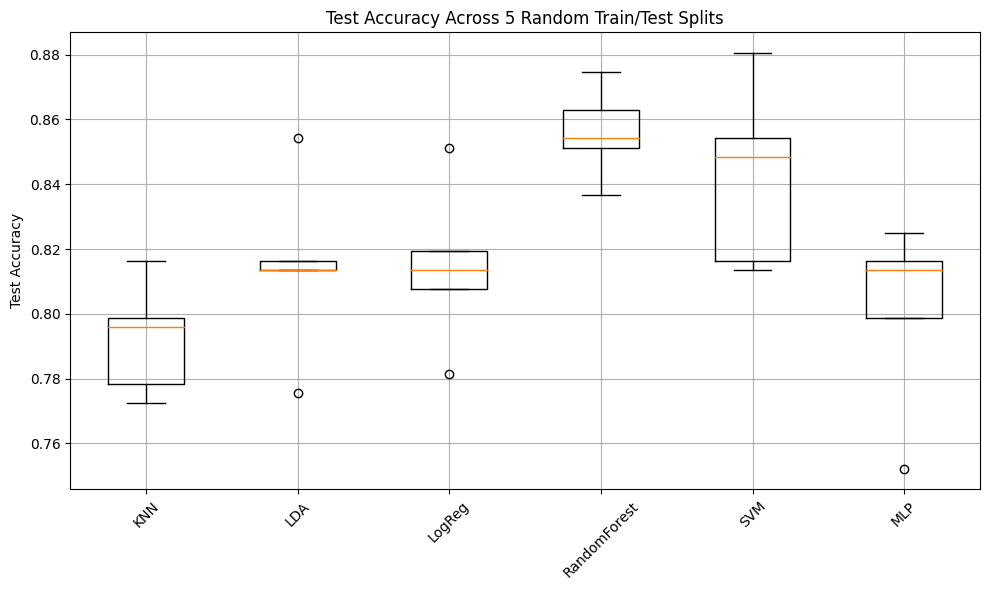

In [12]:
# Print best params for each model across all runs
for name, params_list in best_params_across_runs.items():
    print(f"\n{name} Best Parameters Across Runs:")
    for i, params in enumerate(params_list):
        print(f"  Run {i+1}: {params}")
        
plt.figure(figsize=(10, 6))
plt.boxplot([test_accuracies[name] for name in models.keys()], labels=models.keys())
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Across 5 Random Train/Test Splits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

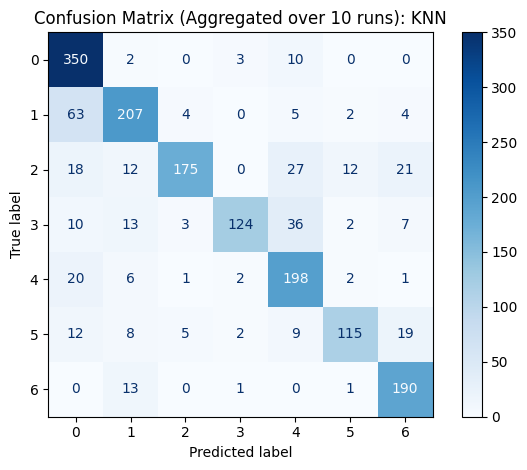

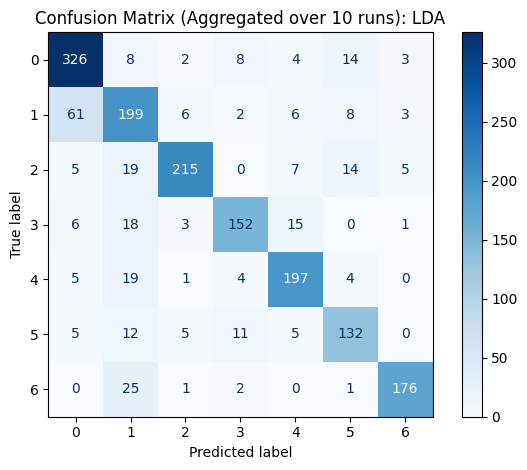

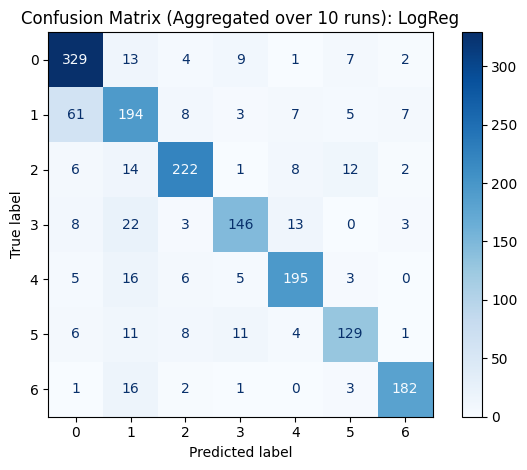

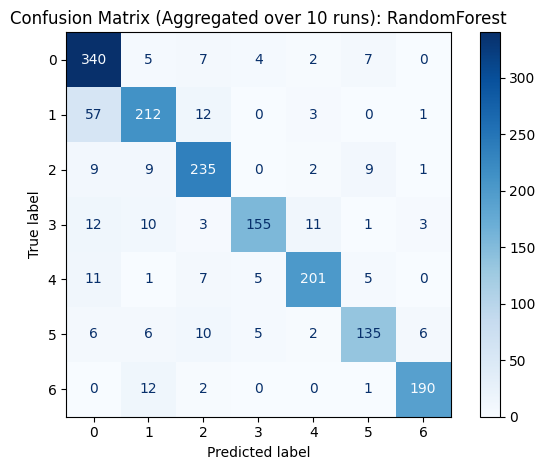

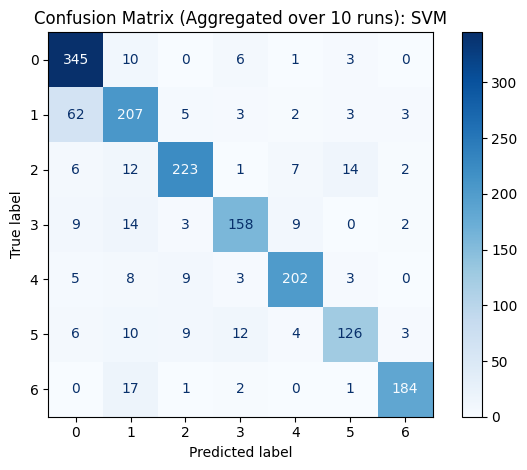

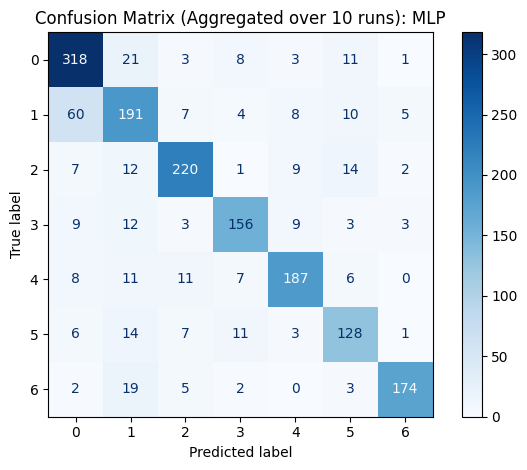

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for name, cm_sum in conf_matrix_sums.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_sum)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix (Aggregated over 10 runs): {name}')
    plt.tight_layout()
    plt.show()